# Grupo
* Pedro Henrique Ikeda - 32016344
* Salomon Asher Motoryn - 41825128

A detecção de bordas é um processo importante em visão computacional e pode ser realizada utilizando diversos operadores de gradiente, tais como Roberts, Prewitt e Sobel. Esses operadores são utilizados para realçar as variações abruptas de intensidade em uma imagem, que correspondem às bordas. Nesta pesquisa, será apresentado como é possível aplicar esses operadores em imagens utilizando a linguagem Python.

# Operador de gradiente Roberts<br>
O operador de gradiente Roberts é um dos mais simples e rápidos para detecção de bordas. Ele utiliza duas máscaras (ou kernels), uma para detectar bordas na direção diagonal e outra para detectar bordas na direção oposta diagonal. A magnitude do gradiente é calculada a partir da soma dos valores absolutos dos pixels em ambas as direções.

A seguir, é apresentado um trecho de código em Python que exemplifica a aplicação do operador de gradiente Roberts utilizando a biblioteca scipy, numpy e scikit-image:

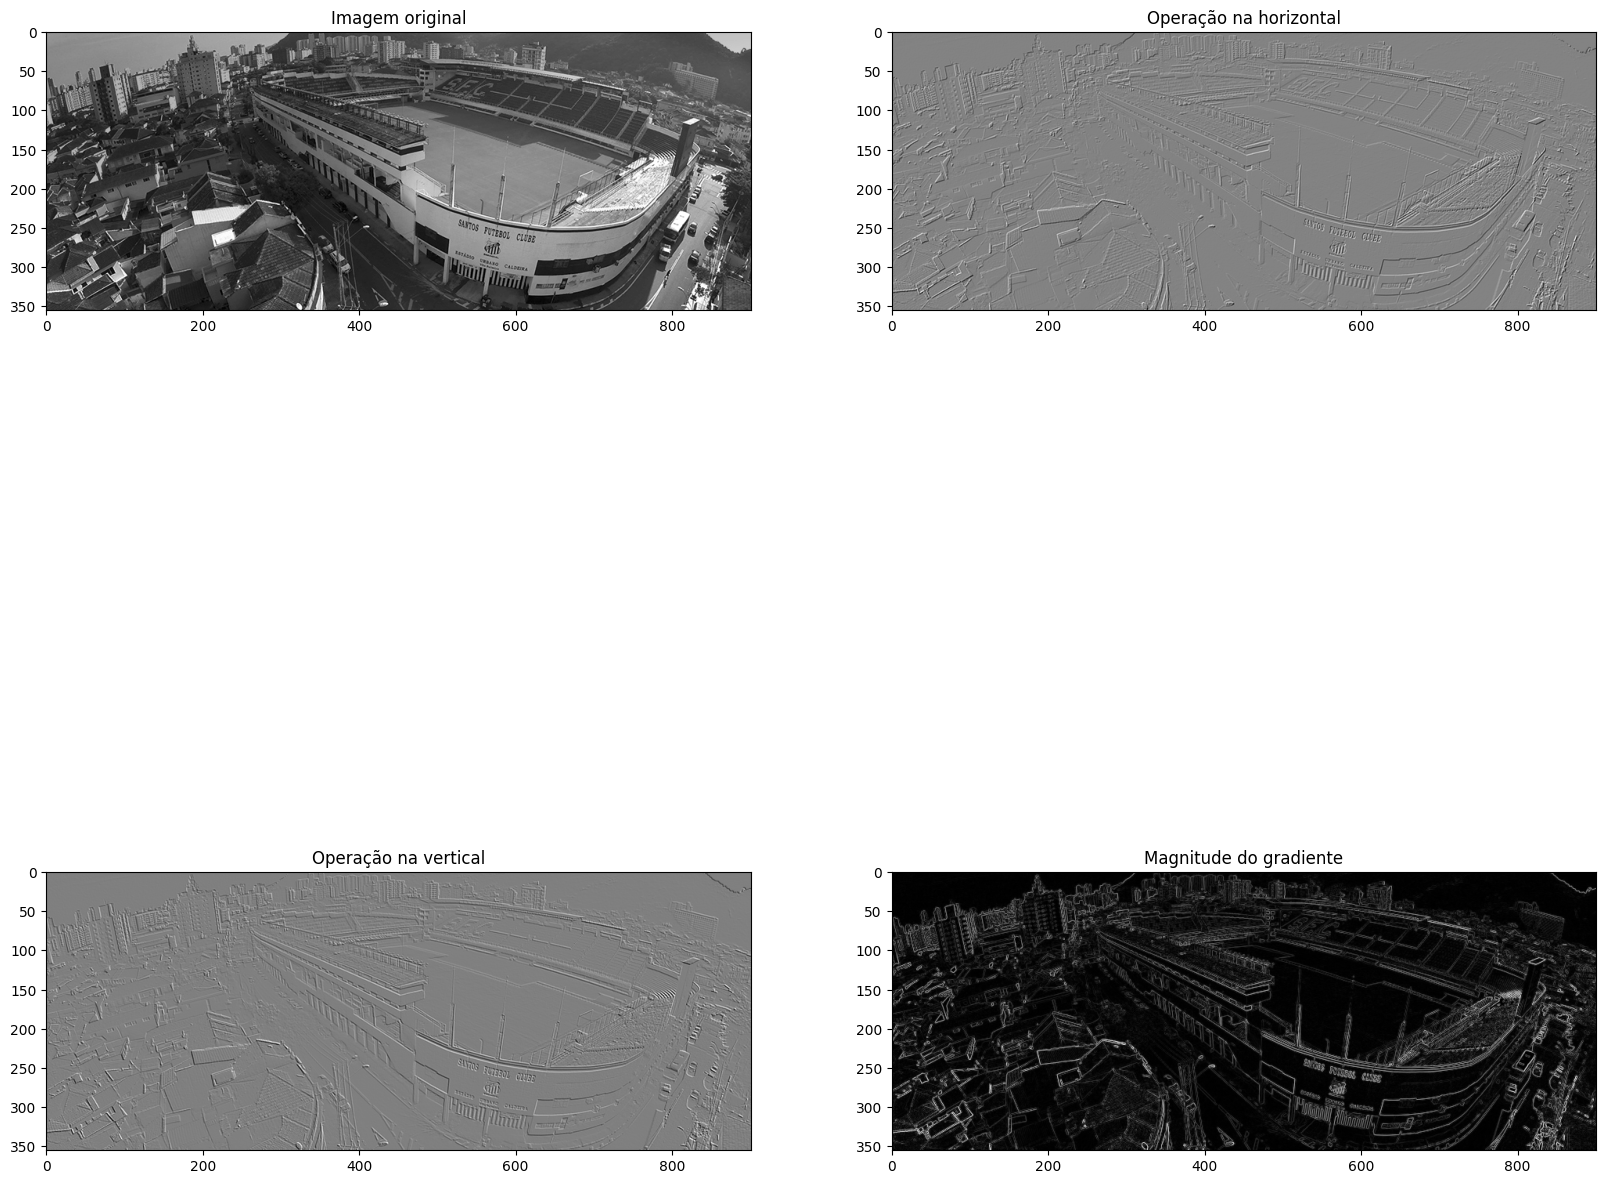

In [14]:
from scipy import ndimage
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt

img = color.rgb2gray(io.imread("hero-vilabelmiro.jpg"))

Gx = np.array([[1, 0], [0, -1]])
Gy = np.array([[0, 1], [-1, 0]])

I_h = ndimage.convolve(img, Gx)
I_v = ndimage.convolve(img, Gy)

I_mag = np.sqrt(np.square(I_h) + np.square(I_v))

fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagem original')

axs[0, 1].imshow(I_h, cmap='gray')
axs[0, 1].set_title('Operação na horizontal')

axs[1, 0].imshow(I_v, cmap='gray')
axs[1, 0].set_title('Operação na vertical')

axs[1, 1].imshow(I_mag, cmap='gray')
axs[1, 1].set_title('Magnitude do gradiente')


plt.show()

# Operador de gradiente Prewitt<br>

O operador de gradiente Prewitt é semelhante ao operador Roberts, mas utiliza uma máscara um pouco mais complexa que leva em conta mais pixels na vizinhança do pixel central. Ele também é utilizado para detectar bordas na direção horizontal e vertical, e a magnitude do gradiente é calculada da mesma forma que no operador Roberts.

A seguir, é apresentado um trecho de código em Python que exemplifica a aplicação do operador de gradiente Prewitt utilizando a biblioteca scikit-image:

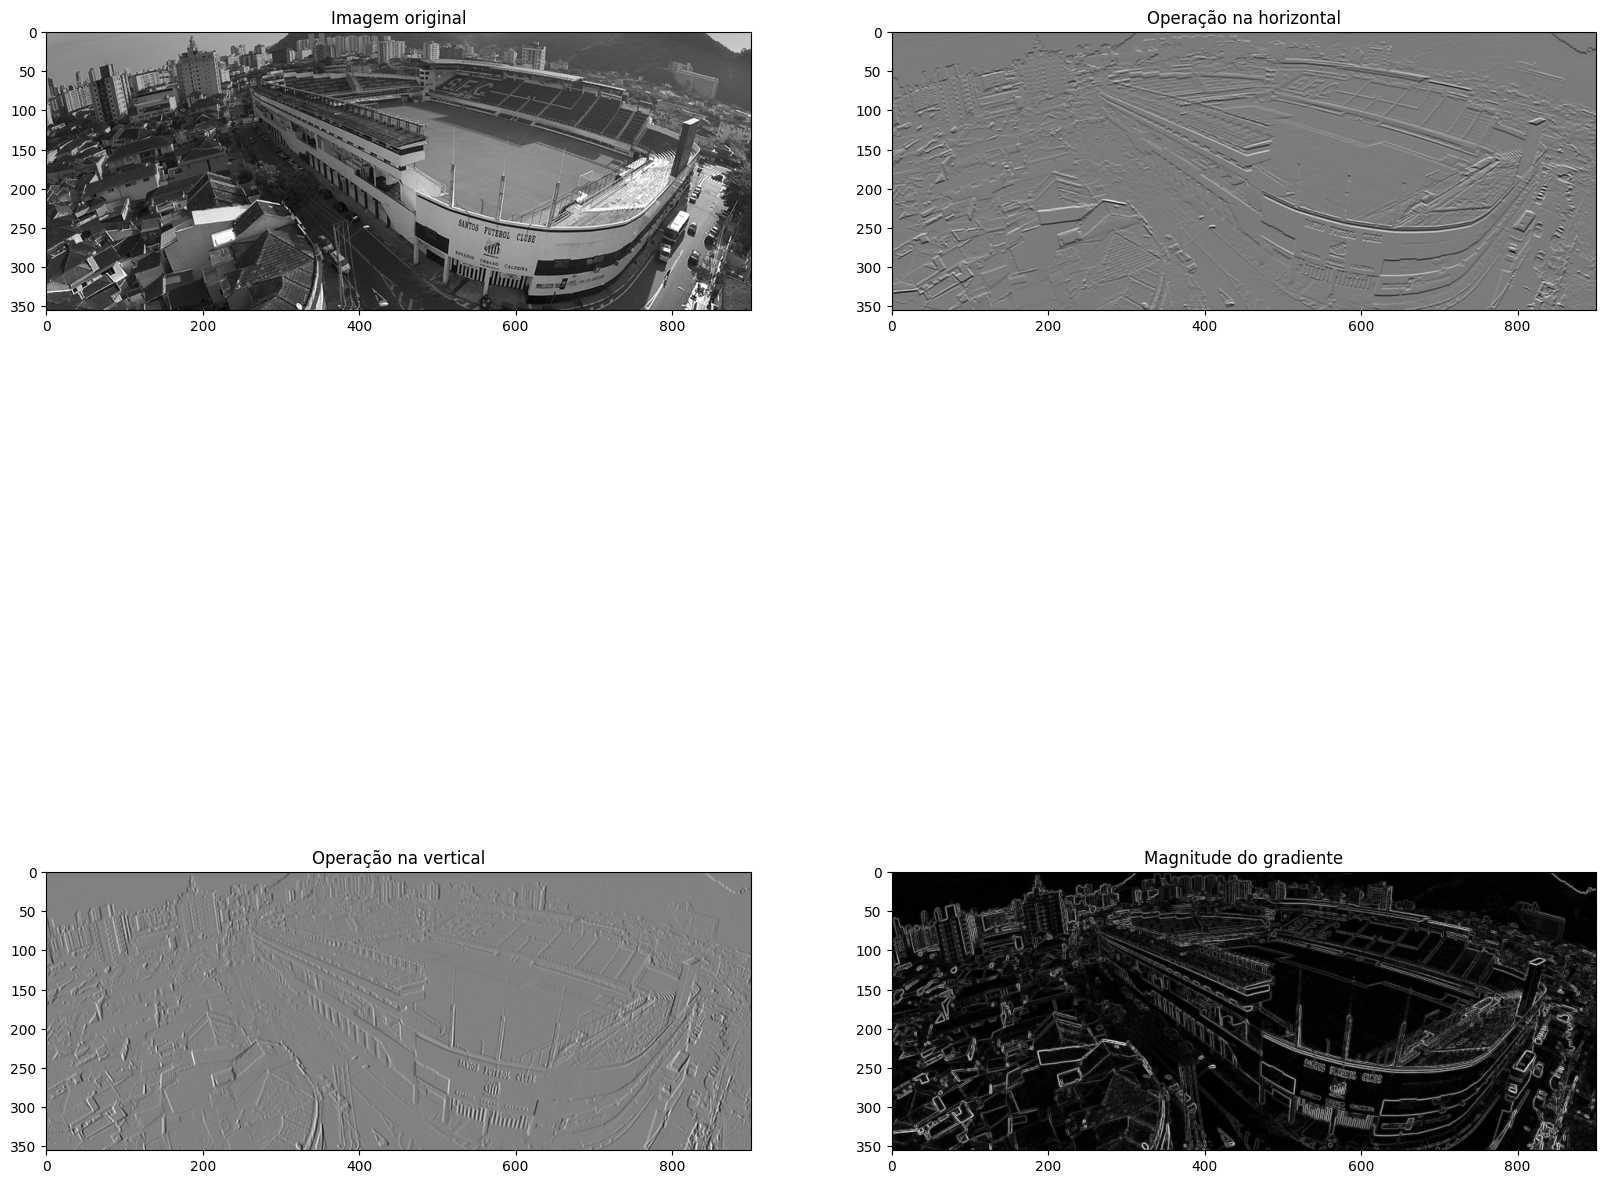

In [15]:
from skimage import io, filters
import numpy as np
from matplotlib import pyplot as plt

# Leitura da imagem
img = io.imread('hero-vilabelmiro.jpg', as_gray=True)

# Aplicação do operador de gradiente Prewitt
I_h = filters.prewitt_h(img)
I_v = filters.prewitt_v(img)

# Cálculo da magnitude do gradiente
I_mag = np.sqrt(np.square(I_h) + np.square(I_v))

# Exibição das imagens
fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagem original')

axs[0, 1].imshow(I_h, cmap='gray')
axs[0, 1].set_title('Operação na horizontal')

axs[1, 0].imshow(I_v, cmap='gray')
axs[1, 0].set_title('Operação na vertical')

axs[1, 1].imshow(I_mag, cmap='gray')
axs[1, 1].set_title('Magnitude do gradiente')

plt.show()

# Operador de gradiente Sobel<br>
O operador de gradiente Sobel é similar ao operador Prewitt, mas utiliza uma máscara ainda mais complexa que leva em conta ainda mais pixels na vizinhança do pixel central. Ele também é utilizado para detectar bordas na direção horizontal e vertical, e a magnitude do gradiente é calculada da mesma forma que nos operadores anteriores.

O operador Sobel utiliza duas máscaras: uma para detecção da variação na direção horizontal (Gx) e outra para a variação na direção vertical (Gy). As máscaras são dadas por:

Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

Assim como o operador Prewitt, o operador Sobel calcula o gradiente da imagem a partir da convolução da imagem com as máscaras Gx e Gy. O gradiente é calculado como a magnitude do vetor gradiente (G), dado por:

G = sqrt(Gx^2 + Gy^2)

Para aplicar o operador Sobel em uma imagem usando a linguagem Python, pode-se utilizar as bibliotecas NumPy e OpenCV. O código abaixo exemplifica como utilizar o operador Sobel com OpenCV:

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("hero-vilabelmiro.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img,(3,3),0)
# I_h = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_h = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
# I_v = cv2.Sobel(img, cv2.CV_64F, 0, 0, ksize=5)
I_v = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

I_mag = np.sqrt(np.square(I_h) + np.square(I_v))

fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagem original')

axs[0, 1].imshow(I_h, cmap='gray')
axs[0, 1].set_title('Operação na horizontal')

axs[1, 0].imshow(I_v, cmap='gray')
axs[1, 0].set_title('Operação na vertical')

axs[1, 1].imshow(I_mag, cmap='gray')
axs[1, 1].set_title('Magnitude do gradiente')

plt.show()



# Referencias

1. https://wisdomml.in/implementing-sobel-filter-edge-detection-in-python-using-opencv/
1. https://machinelearningprojects.net/sobel-x-and-sobel-y-in-cv2/
1. https://www.geeksforgeeks.org/python-opencv-roberts-edge-detection/
1. https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.prewitt_h